#Diamonds Sale Data

https://www.kaggle.com/code/kamilshaydullin/price-prediction-lr-ann-gbr-mape-0-79

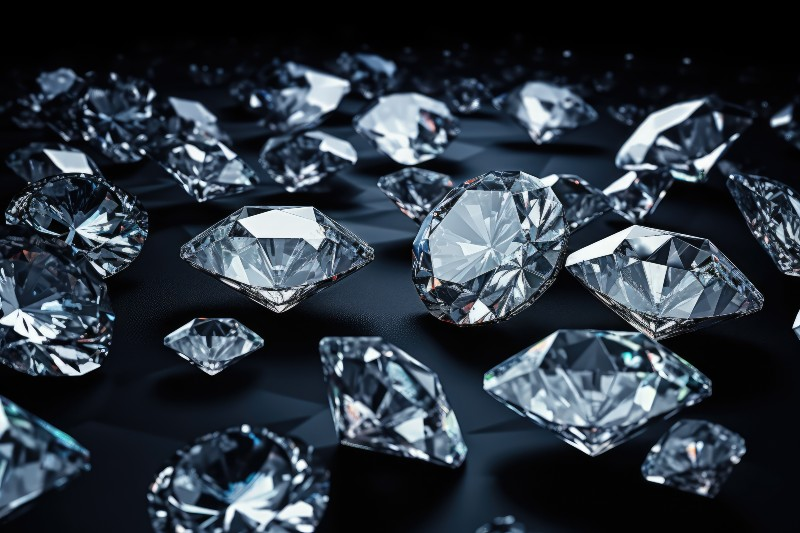

#### We have a big dataset made up of 53490 diamond sales entries which we can use to train a predictive model.
#### An effective predictive model can be used to accurately price diamonds given we have all of the diamond features that the model has been trained on.
#### Strictly speaking we can quite accuratly estimate the price of diamonds even if we don't have certain featrures since some of them are strongly correlated, such as length, width and depth.

#### After data cleaning and feature engineering I trained 3 separate models.
#### The models all turned out to be sufficiently accurate, measured by mean absolute percentage error (MAPE), yet they vary in computational complexity:
#### Artificial Neural Network (ANN) - MAPE = 1.43%
#### Linear Regression (LR) - MAPE = 1.03%
#### Gradient Boosting Regressor (GBR) - MAPE = 0.79%

#### **GBR** turned out to be the most accurate model with **MAPE = 0.79%**

### Diamond characteristics / Features:

**Color** - In the data set: D (Absolutely Colorless), E (Colorless), F (Colorless), G (Near Colorless), H (Near Colorless), I (Near Colorless), J (Near Colorless). D = best, J = worst.

**Clarity** - In the data set: IF (100%), VVS1 (99%), VVS2 (99%), VS1 (95%), VS2 (85%), SI1 (50%), SI2 (15%), I1 (1%). IF = best, I1 = worst.

**Carat** - In the data set: min - 0.2 carat, max - 5.01 carat. Carat describes the weight of a diamond. 1 carat = 0.2 grams.

**Cut** - In the data set: Ideal, Premium, Very Good, Good, Fair. Diamond cut grade is based on a number of factors including symmetry, polish, brilliance and fire.

**Depth** - In the data set: min - 43, max - 79. The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base. The depth of any diamond is expressed as a percentage. Depth percentage is calculated by dividing the diamond’s total height by its total width. The deeper the diamond’s depth, the higher the diamond’s depth percentage. Great diamonds are all about proportion. When a diamond has the right combination of depth and table percentages, it’s more capable of taking in and reflecting light. This results in a stronger, more beautiful sparkle and better visual balance.

**Table** - In the data set: min - 43, max - 95. A diamond’s table is the flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above. As the largest facet on a diamond, the table plays a major role in determining how brilliant (sparkly) the diamond is. Ideal table size depends on the cut of a diamond.

**X** - In the data set: min - 0(errors), max - 10.74. Length in mm.

**Y** - In the data set: min - 0(errors), max - 58.9. Width in mm.

**Z** - In the data set: min - 0(errors), max - 31.8. Depth in mm.

**Price** - Price of a particular diamond. THis is the dependent variable we are trying to predict.

https://www.gia.edu/diamond-quality-factor

https://www.diamonds.pro/education/diamond-depth-and-table/#Is-Depth-important-in-a-diamond


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
!pip install scikeras
from scikeras.wrappers import KerasRegressor

## Loading data

In [ ]:
pd.set_option('display.max_columns', None)
raw_diamonds_data = pd.read_csv('diamonds.csv')

# Renaming 'x', 'y' and 'z' columns to 'length_mm', 'width_mm' and 'depth_mm'.
raw_diamonds_data.rename(columns={'x': 'length_mm',
                                  'y': 'width_mm',
                                  'z': 'depth_mm'},
                         inplace = True)

raw_diamonds_data.info()
print(raw_diamonds_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length_mm  53940 non-null  float64
 8   width_mm   53940 non-null  float64
 9   depth_mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
length_mm    0
width_mm     0
depth_mm     0
dtype: int64


## Analytics

In [ ]:
# Checking distributions of variables and outliers
all_columns = ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'length_mm', 'width_mm', 'depth_mm', 'price']
discrete_columns = ['cut', 'color', 'clarity']
continuous_columns = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'depth_mm', 'price']

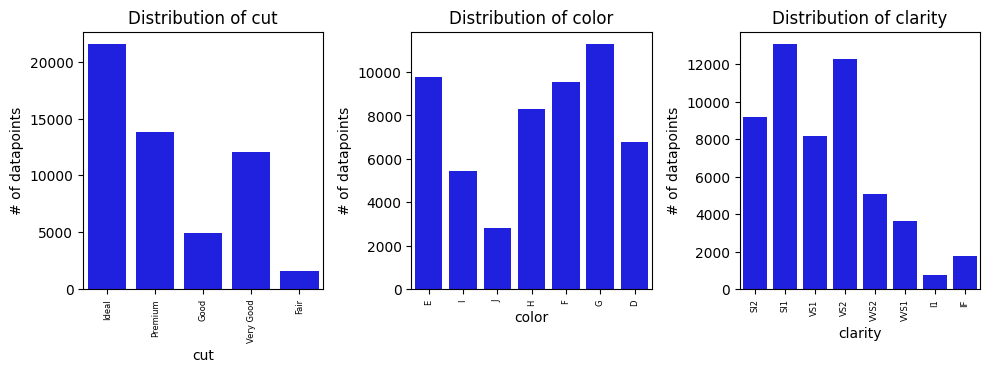

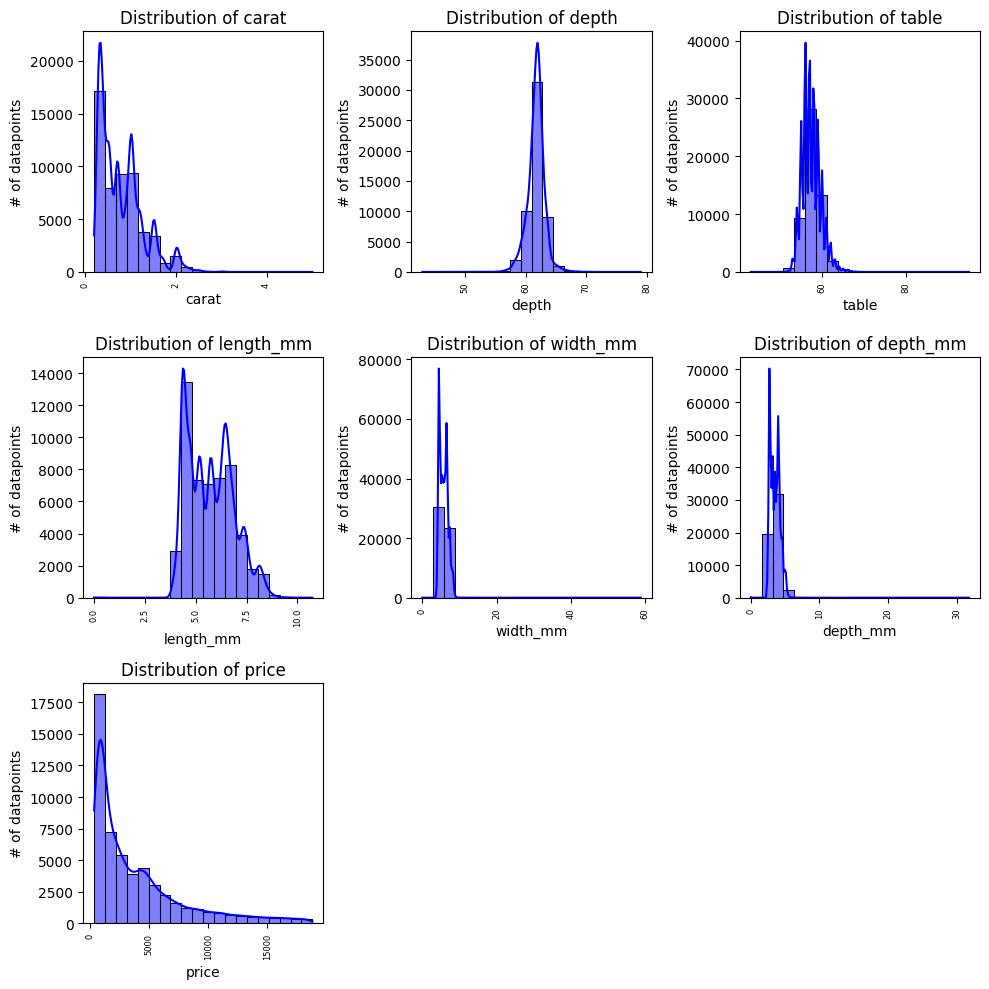

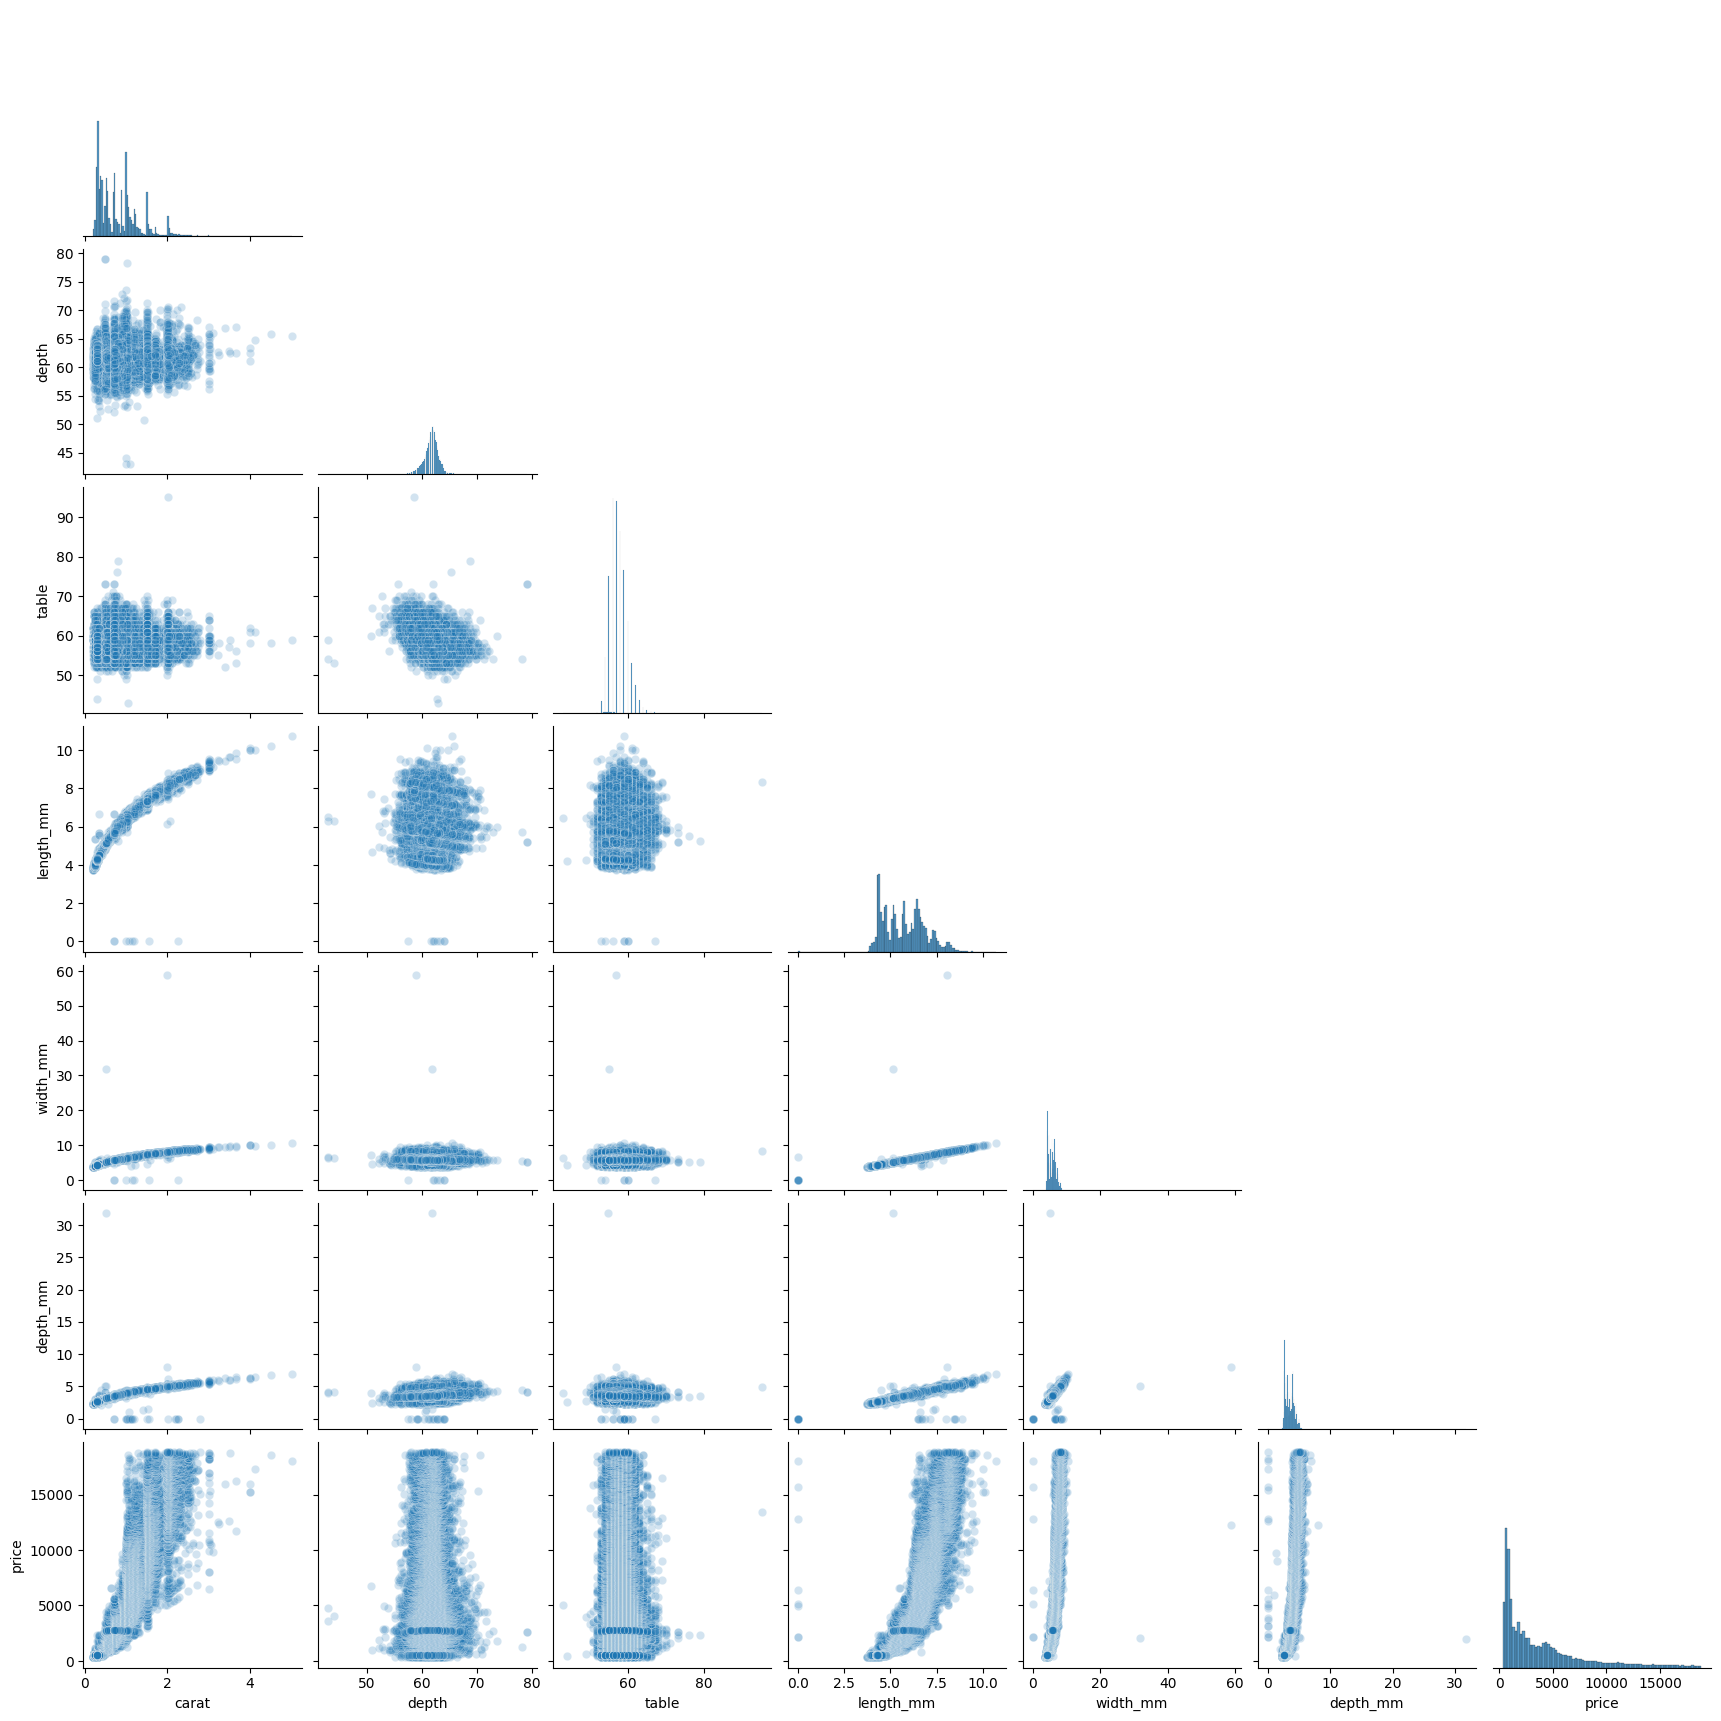

In [ ]:
# Creating a matrix of distributions of discrete columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(discrete_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=raw_diamonds_data, x=column, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

# Creating a matrix of distributions of continuous columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(continuous_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data = raw_diamonds_data[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

# Checking for outliers
sns.pairplot(raw_diamonds_data[continuous_columns], corner=True, plot_kws={'alpha':0.2})

### As shown above, there are a lot of outliers in the data that will inhibit predictive power of algorithms if we don't remove them.

## Data cleaning

In [ ]:
# Removing outliers in continuous columns
diamonds_data = raw_diamonds_data.copy()
diamonds_data = diamonds_data[diamonds_data['width_mm'] <= 20]
diamonds_data = diamonds_data[diamonds_data['depth_mm'] <= 10]
diamonds_data = diamonds_data[diamonds_data['depth_mm'] >= 2.33]
diamonds_data = diamonds_data[diamonds_data['depth'] >= 52]
diamonds_data = diamonds_data[diamonds_data['depth'] <= 75]
diamonds_data = diamonds_data[diamonds_data['table'] >= 50]
diamonds_data = diamonds_data[diamonds_data['table'] <= 75]

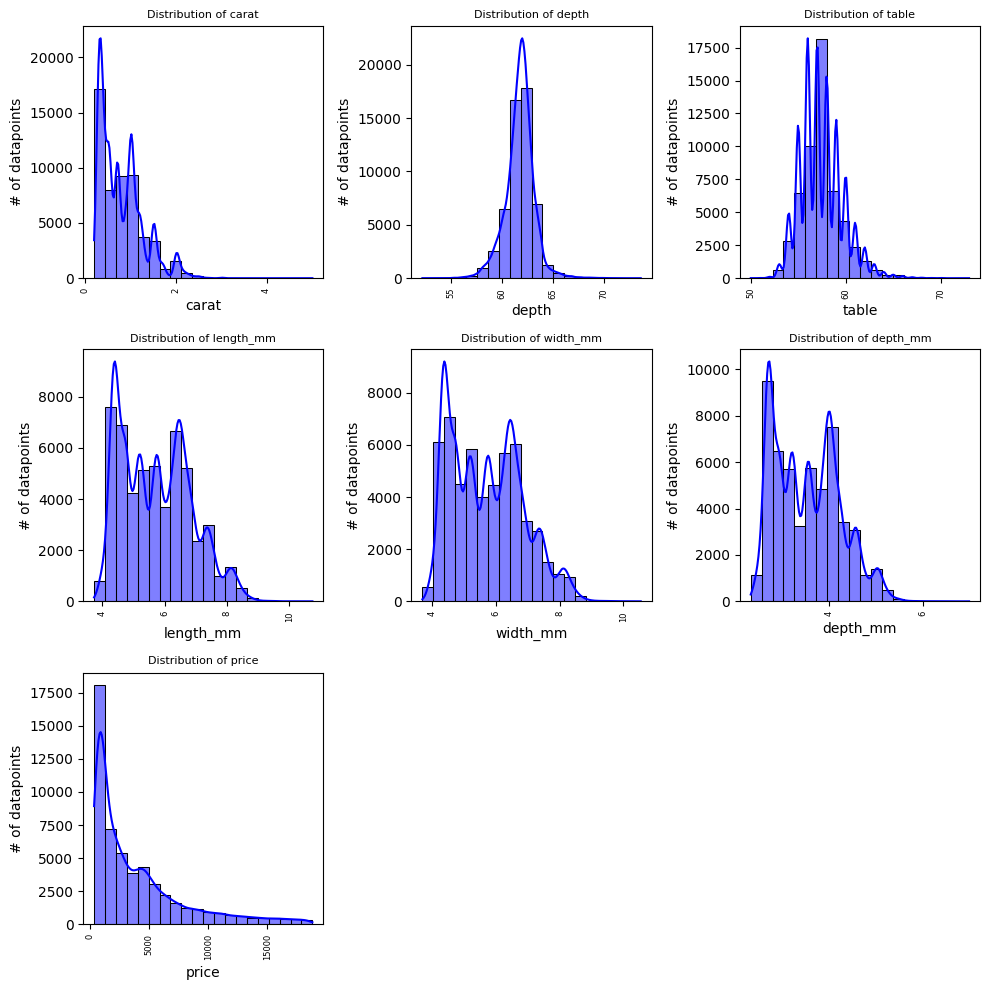

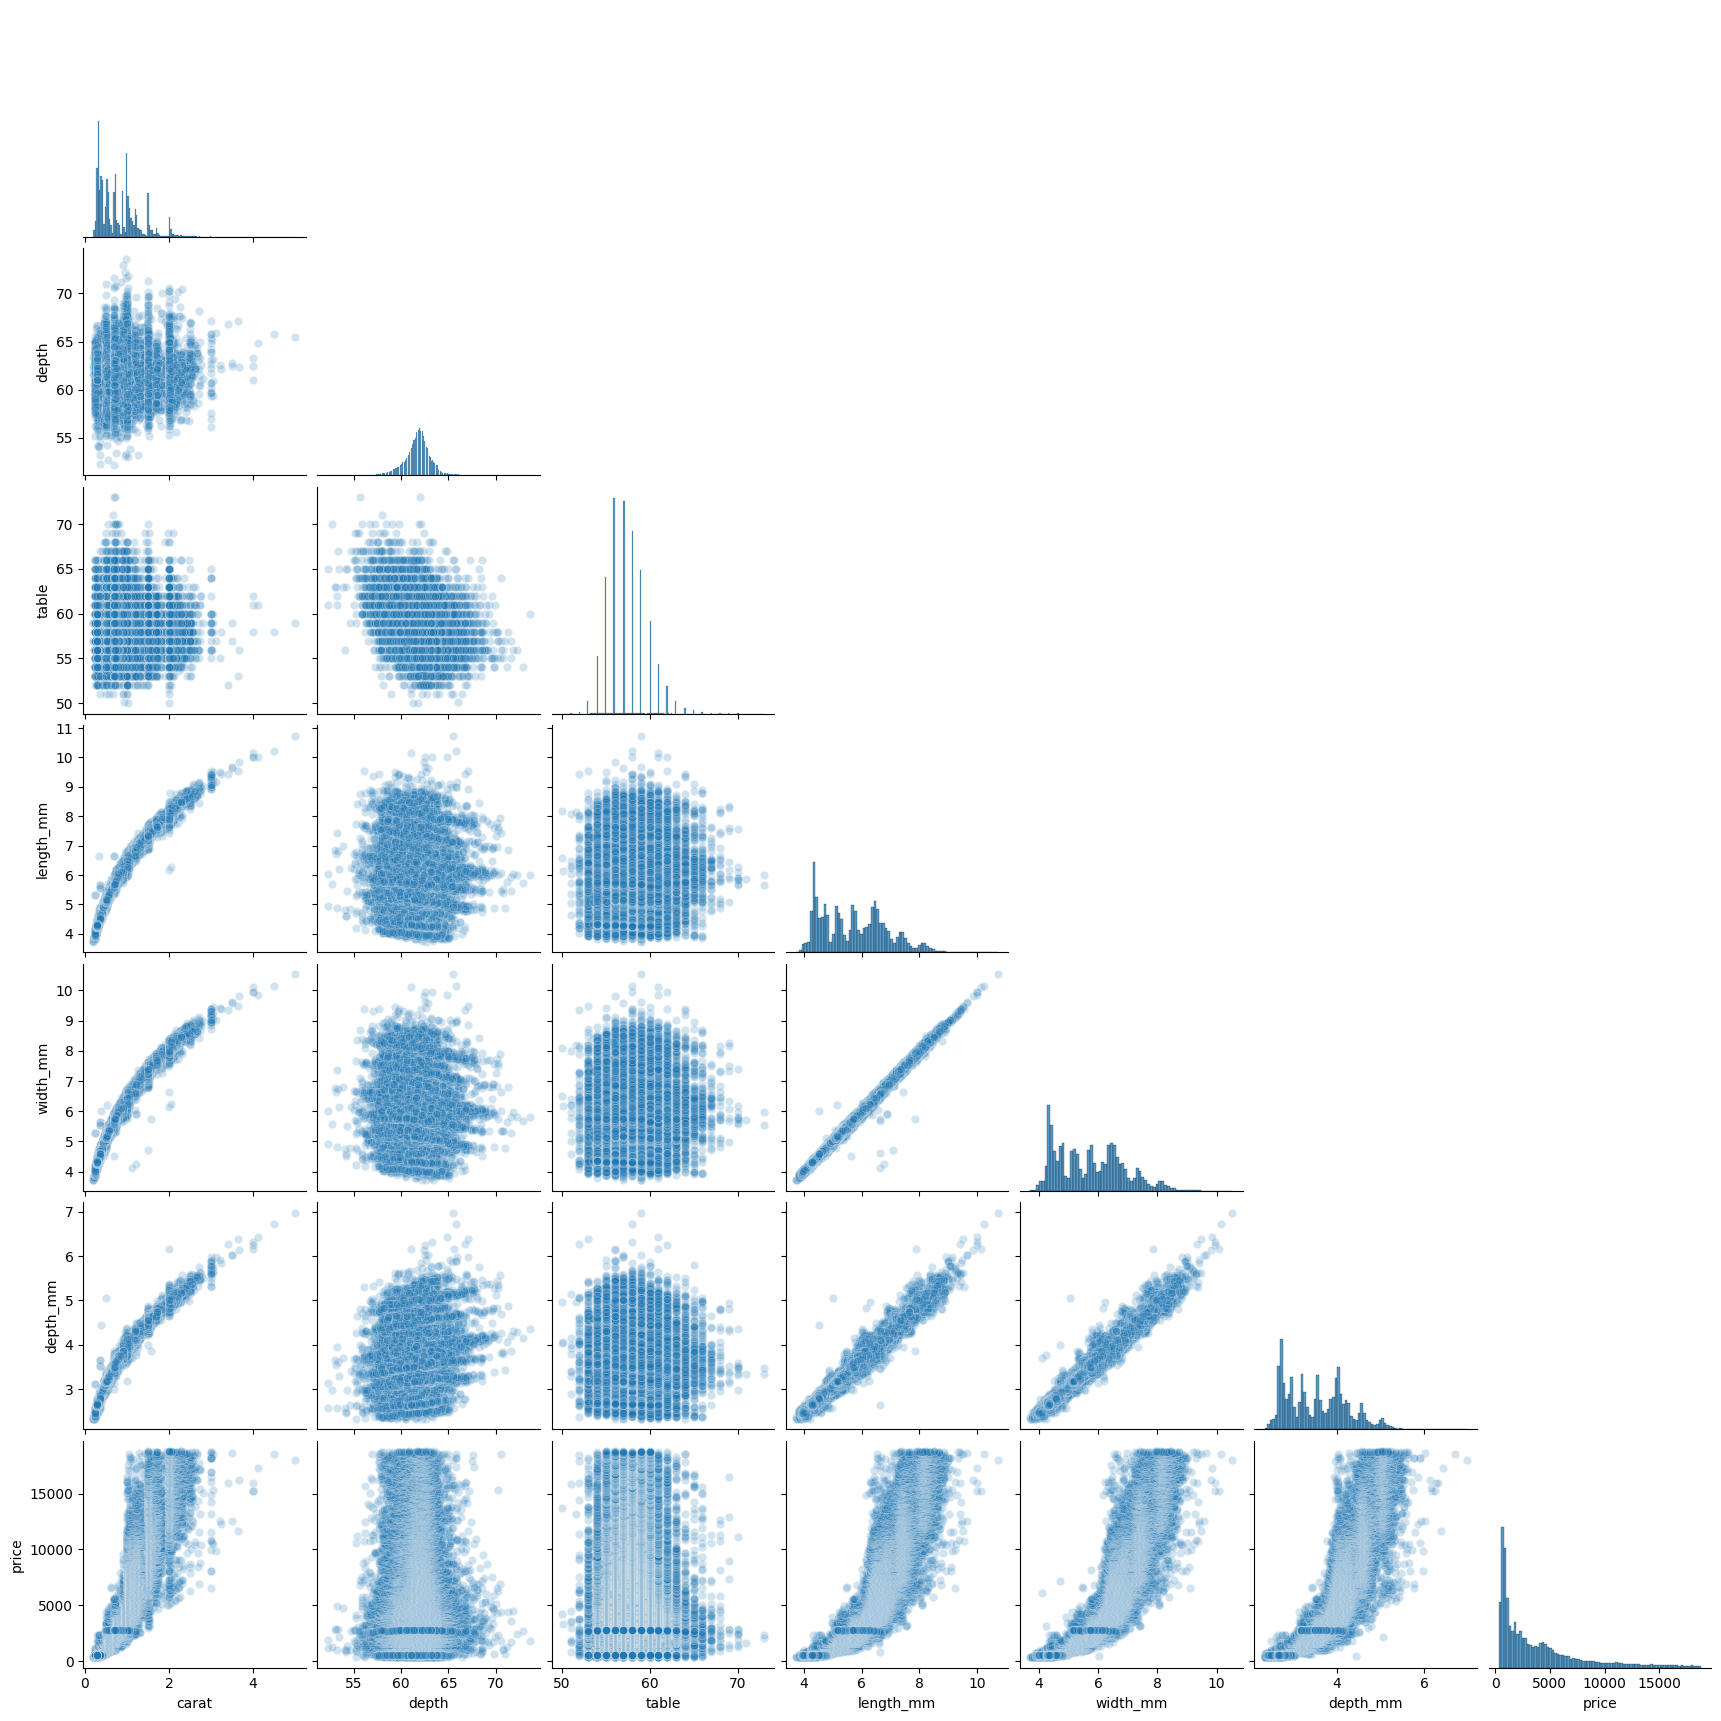

In [ ]:
# Creating a matrix of distributions of continuous columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(continuous_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data = diamonds_data[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

# Checking for outliers
sns.pairplot(diamonds_data[continuous_columns], corner=True, plot_kws={'alpha':0.2})

### The outliers are mostly gone but there are  logarithmic relationship between price, carat, length_mm, width_mm and depth_mm which we need to make linear to increase predictive power of the machine learning algorithms.

## Data preprocessing

In [ ]:
# Encoding discrete features
diamonds_data = pd.get_dummies(data=diamonds_data, columns=discrete_columns, drop_first=True)

encoded_columns = diamonds_data.columns.tolist()
encoded_discrete_columns = [item for item in encoded_columns if item not in all_columns]

In [ ]:
# Applying logarithmic transformations to appropriate columns and checking relationships
diamonds_data_log = diamonds_data.copy()
diamonds_data_log['price'] = diamonds_data_log['price'].transform(np.log)
diamonds_data_log['carat'] = diamonds_data_log['carat'].transform(np.log)
diamonds_data_log['length_mm'] = diamonds_data_log['length_mm'].transform(np.log)
diamonds_data_log['width_mm'] = diamonds_data_log['width_mm'].transform(np.log)
diamonds_data_log['depth_mm'] = diamonds_data_log['depth_mm'].transform(np.log)

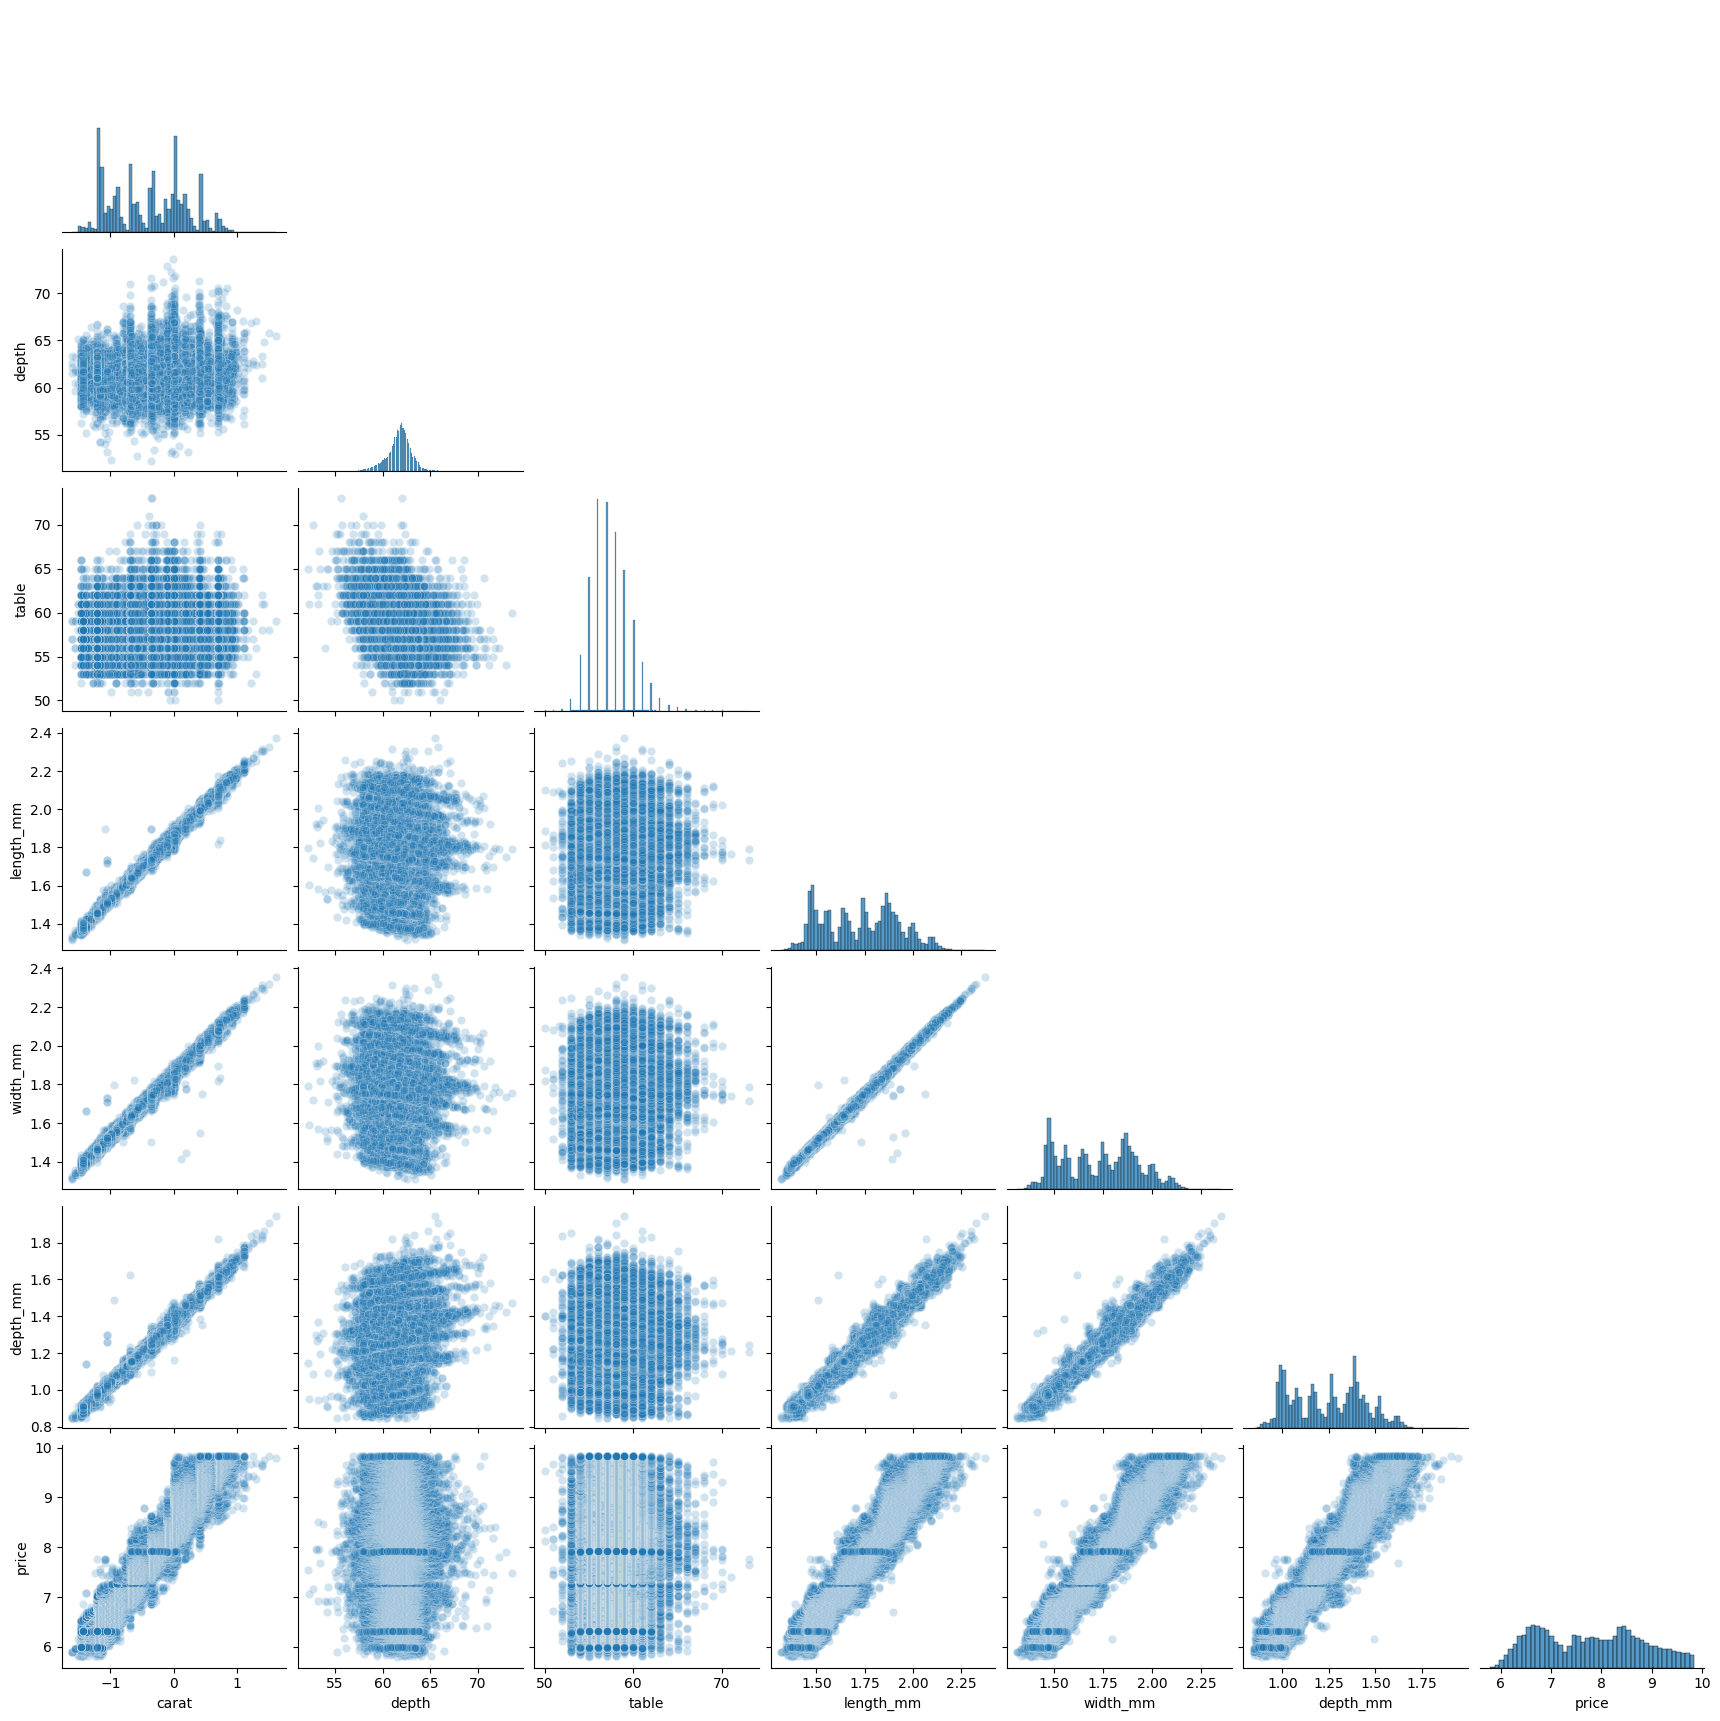

In [ ]:
# Checking relationships
sns.pairplot(diamonds_data_log[continuous_columns], corner=True, plot_kws={'alpha':0.2})

### To reduce the number outliers further in the future I will remove datapoints that are significantly above or below trendlines (red dotted lines) as in the examples below.

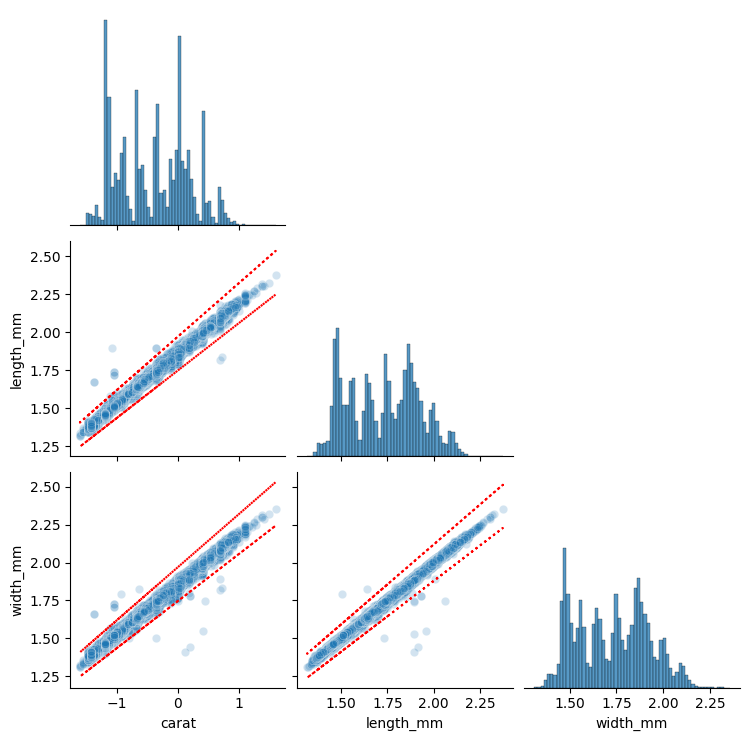

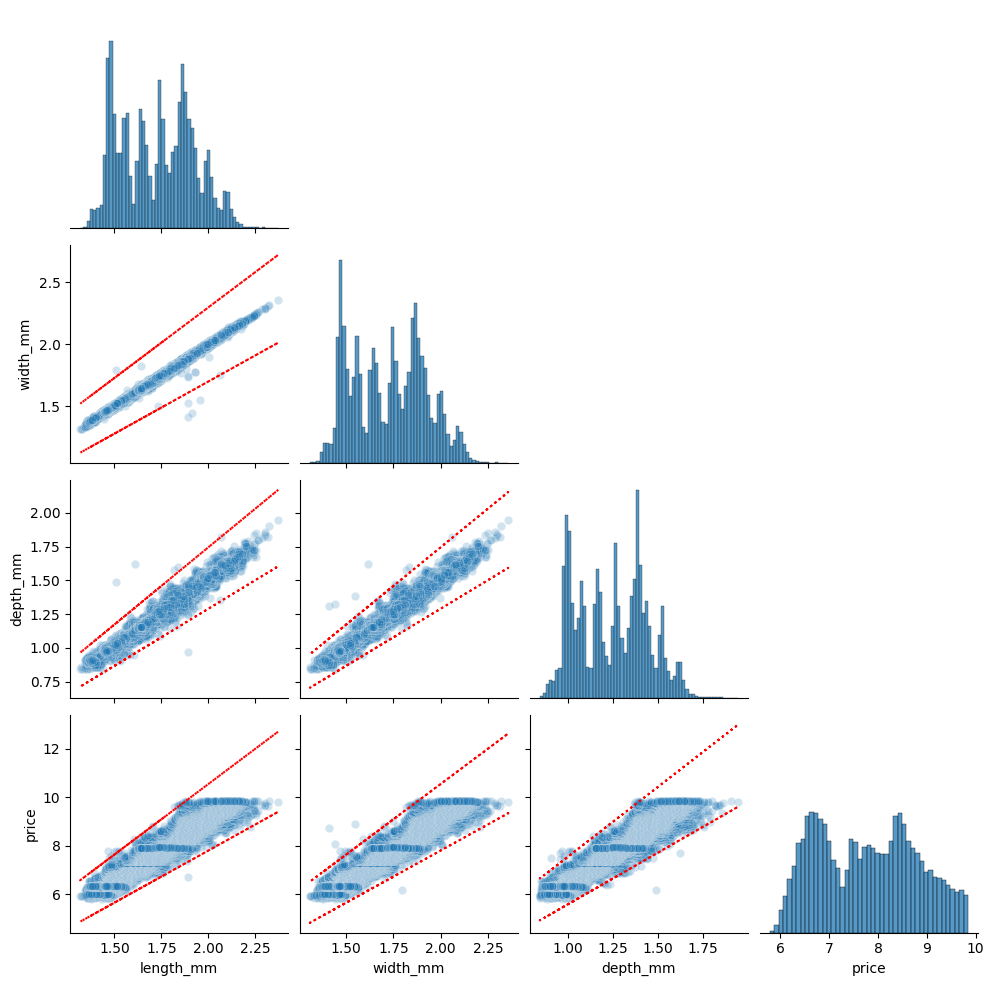

In [ ]:
features_1 = ['carat','length_mm', 'width_mm']
features_2 = ['length_mm', 'width_mm', 'depth_mm', 'price']

pairplot = sns.pairplot(diamonds_data_log[features_1], corner=True, plot_kws={'alpha':0.2})
for ax in pairplot.axes.flat:
    if ax and ax.xaxis.get_label_text() and ax.yaxis.get_label_text():
        x, y = ax.collections[0].get_offsets().T
        slope, intercept = np.polyfit(x, y, 1)
        upper_line = x * (1 + 0.06) * slope + (intercept * (1 + 0.06))
        lower_line = x * (1 - 0.06) * slope + (intercept * (1 - 0.06))
        ax.plot(x, upper_line, color='red', linestyle='dotted')
        ax.plot(x, lower_line, color='red', linestyle='dotted')
plt.show()

pairplot = sns.pairplot(diamonds_data_log[features_2], corner=True, plot_kws={'alpha':0.2})
for ax in pairplot.axes.flat:
    if ax and ax.xaxis.get_label_text() and ax.yaxis.get_label_text():
        x, y = ax.collections[0].get_offsets().T
        slope, intercept = np.polyfit(x, y, 1)
        upper_line = x * (1 + 0.15) * slope + (intercept * (1 + 0.15))
        lower_line = x * (1 - 0.15) * slope + (intercept * (1 - 0.15))
        ax.plot(x, upper_line, color='red', linestyle='dotted')
        ax.plot(x, lower_line, color='red', linestyle='dotted')
plt.show()

In [ ]:
# Splitting data into independent (X) and dependent (y) variables
X_log = diamonds_data_log.drop(columns=['price'])
y = diamonds_data_log['price']

In [ ]:
# Engineering new features using PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = True)
X_log_poly = poly.fit_transform(X_log)

In [ ]:
# Splitting data into train and test sets for machine learning
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)
X_train_log_poly, X_test_log_poly, y_train, y_test = train_test_split(X_log_poly, y, test_size=0.2, random_state=42)

## Artificial Neural Network (ANN)

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

In [ ]:
# Constructing the ANN
def create_model():
    model = Sequential([
        Dense(1024, input_shape=(X_train_log_scaled.shape[1],), activation="relu", name="hidden-dense-layer-1"),
        Dropout(0.5),
        Dense(512, activation="relu", name="hidden-dense-layer-2"),
        Dropout(0.5),
        Dense(512, activation="relu", name="hidden-dense-layer-3"),
        Dropout(0.5),
        Dense(256, activation="relu", name="hidden-dense-layer-4"),
        Dropout(0.5),
        Dense(1, activation='linear', name="output-layer"),
    ])
    model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(learning_rate=0.0003), metrics=['mean_absolute_percentage_error'])
    return model

Epoch 1/500
539/539 - 17s - 31ms/step - loss: 15.2515 - mean_absolute_percentage_error: 15.2515 - val_loss: 27.3605 - val_mean_absolute_percentage_error: 27.3605
Epoch 2/500
539/539 - 1s - 2ms/step - loss: 11.4618 - mean_absolute_percentage_error: 11.4618 - val_loss: 27.1191 - val_mean_absolute_percentage_error: 27.1191
Epoch 3/500
539/539 - 1s - 2ms/step - loss: 10.5734 - mean_absolute_percentage_error: 10.5734 - val_loss: 22.0761 - val_mean_absolute_percentage_error: 22.0761
Epoch 4/500
539/539 - 3s - 5ms/step - loss: 9.6196 - mean_absolute_percentage_error: 9.6196 - val_loss: 18.5017 - val_mean_absolute_percentage_error: 18.5017
Epoch 5/500
539/539 - 3s - 5ms/step - loss: 8.6328 - mean_absolute_percentage_error: 8.6328 - val_loss: 10.0403 - val_mean_absolute_percentage_error: 10.0403
Epoch 6/500
539/539 - 2s - 4ms/step - loss: 8.2855 - mean_absolute_percentage_error: 8.2855 - val_loss: 8.3179 - val_mean_absolute_percentage_error: 8.3179
Epoch 7/500
539/539 - 1s - 3ms/step - loss: 8.

<function matplotlib.pyplot.show(close=None, block=None)>

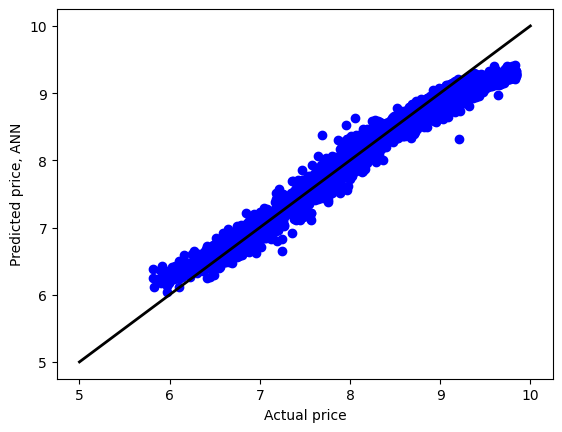

In [ ]:
# Training the model on the training data
KR = KerasRegressor(build_fn=create_model, epochs=500, batch_size=64, validation_split=0.2, random_state=42, verbose=2)
KR.fit(X_train_log_scaled, y_train)

# Predicting y and checking MAPE
y_pred_ANN = KR.predict(X_test_log_scaled)
percent_errors = np.abs((y_test - y_pred_ANN) / y_test) * 100
print("Artificial Neural Network MAPE = ", np.mean(percent_errors), "%")

# Plotting results
plt.scatter(y_test, y_pred_ANN, color='blue')
plt.ylabel('Predicted price, ANN')
plt.xlabel('Actual price')
plt.plot([5, 10], [5, 10], color='black', lw=2)
plt.show

In [ ]:
# Downloading results
results_ANN = pd.DataFrame({'y_test_ANN': y_test, 'y_pred_ANN': y_pred_ANN})
results_ANN.to_csv('results_ANN.csv', index=True)

## Linear Regression

Linear Regression MAPE =  1.0332391445548554 %


<function matplotlib.pyplot.show(close=None, block=None)>

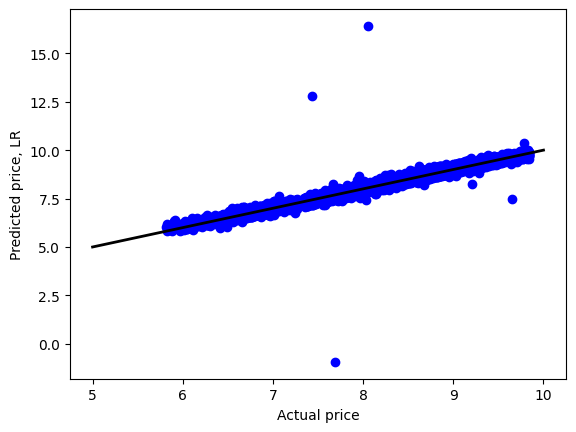

In [ ]:
# Training the model on the training data
LR = LinearRegression()
LR.fit(X_train_log_poly, y_train)

# Predicting y and checking MAPE
y_pred_LR = LR.predict(X_test_log_poly)
percent_errors = np.abs((y_test - y_pred_LR) / y_test) * 100
print("Linear Regression MAPE = ", np.mean(percent_errors), "%")

# Plotting results
plt.scatter(y_test, y_pred_LR, color='blue')
plt.ylabel('Predicted price, LR')
plt.xlabel('Actual price')
plt.plot([5, 10], [5, 10], color='black', lw=2)
plt.show

In [ ]:
# Downloading results
results_LR = pd.DataFrame({'y_test_LR': y_test, 'y_pred_LR': y_pred_LR})
results_LR.to_csv('results_LR.csv', index=True)

## Gradient Boosting Regressor

In [ ]:
#param_grid = {
#    'n_estimators': [1810, 1815, 1820],
#    'max_depth': [6, 7, 8],
#    'learning_rate': [0.03945, 0.03946, 0.03947]}
#
## Running a GridSearch to determine the optimal parameters
#grid_search_GBR = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', verbose=4)
#grid_search_GBR.fit(X_train_log, y_train)
#
## Printing the best parameters and MAPE
#print("Best parameters:", grid_search_GBR.best_params_)
#print("Best MAPE:", -grid_search_GBR.best_score_)

Gradient Boosting Regressor MAPE =  0.7879380953526629 %


<function matplotlib.pyplot.show(close=None, block=None)>

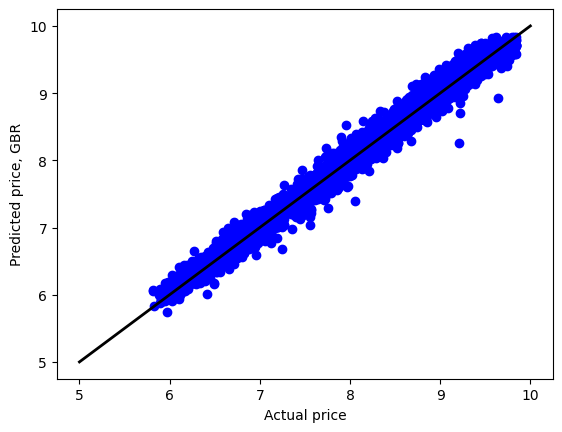

In [ ]:
# Training the model on the training data
GBR = GradientBoostingRegressor(random_state=42, learning_rate = 0.03946, max_depth = 7, n_estimators = 1815)
GBR.fit(X_train_log, y_train)

# Predicting y and checking MAPE
y_pred_GBR = GBR.predict(X_test_log)
percent_errors = np.abs((y_test - y_pred_GBR) / y_test) *100
print("Gradient Boosting Regressor MAPE = ", np.mean(percent_errors), "%")

# Plotting results
plt.scatter(y_test, y_pred_GBR, color='blue')
plt.ylabel('Predicted price, GBR')
plt.xlabel('Actual price')
plt.plot([5, 10], [5, 10], color='black', lw=2)
plt.show

In [ ]:
# Downloading results
results_GBR = pd.DataFrame({'y_test_GBR': y_test, 'y_pred_GBR': y_pred_GBR})
results_GBR.to_csv('results_GBR.csv', index=True)

## To conclude, **GBR** turned out to be the most accurate model with **MAPE = 0.79%**